# Tasks

In [6]:
%matplotlib inline

import geopandas
from pysal.lib import examples
import seaborn as sns
import pandas as pd
from pysal.viz import mapclassify
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lsoas = geopandas.read_file("data/Access_to_Healthy_Assets_and_Hazards_AHAH/Local_Authority_Districts/E08000012/shapefiles/E08000012.shp")

In [4]:
ahah_data = pd.read_csv("data/Access_to_Healthy_Assets_and_Hazards_AHAH/Local_Authority_Districts/E08000012/tables/E08000012.csv")

In [5]:
ahah = lsoas.join(ahah_data.set_index("lsoa11cd"), on="lsoa11cd")

In [7]:
ahah.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   lsoa11cd      298 non-null    object  
 1   geometry      298 non-null    geometry
 2   lsoa11nm      298 non-null    object  
 3   r_rank        298 non-null    int64   
 4   h_rank        298 non-null    int64   
 5   g_rank        298 non-null    int64   
 6   e_rank        298 non-null    int64   
 7   r_exp         298 non-null    float64 
 8   h_exp         298 non-null    float64 
 9   g_exp         298 non-null    float64 
 10  e_exp         298 non-null    float64 
 11  ahah          298 non-null    float64 
 12  r_ahah        298 non-null    int64   
 13  d_ahah        298 non-null    int64   
 14  r_dec         298 non-null    int64   
 15  h_dec         298 non-null    int64   
 16  g_dec         298 non-null    int64   
 17  e_dec         298 non-null    int64   
 18  gp

In [10]:
ahah.ahah.describe()

count    298.000000
mean      25.423092
std        6.378593
min       14.861336
25%       20.582157
50%       24.287770
75%       29.605299
max       48.067407
Name: ahah, dtype: float64

# Task 1: AHAH choropleths

Create the following choropleths and, where possible, complement them with a figure that displays the distribution of values using a KDE:

* Equal Interval with five classes
* Quantiles with five classes
* Fisher-Jenks with five classes
* Unique Values with the following setup:
    - Split the LSOAs in two classes: above and below the average AHAH score
    - Assign a qualitative label (above or below) to each LSOA
    - Create a unique value map for the labels you have just created


## Equal Interval with five classes

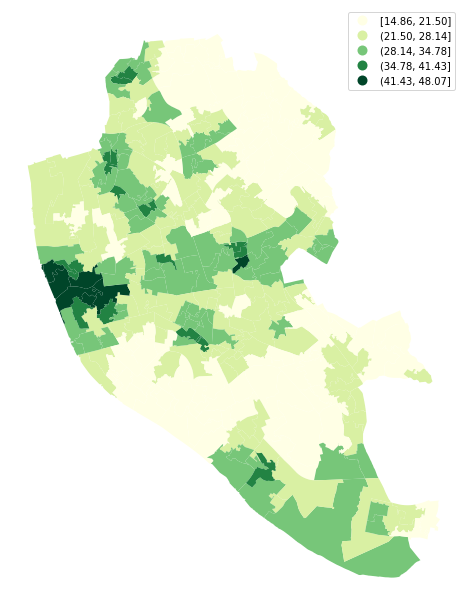

In [13]:
ax = ahah.plot(column="ahah", 
        scheme="equal_interval", 
        k=5,
        cmap="YlGn",
        legend=True,
        figsize=(10, 11)
       )

ax.set_axis_off()

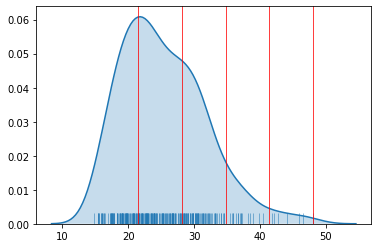

In [18]:
classi = mapclassify.EqualInterval(ahah["ahah"], k=5)

# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(ahah["ahah"], shade=True, legend=False)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(ahah["ahah"], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

## Quantiles with five classes

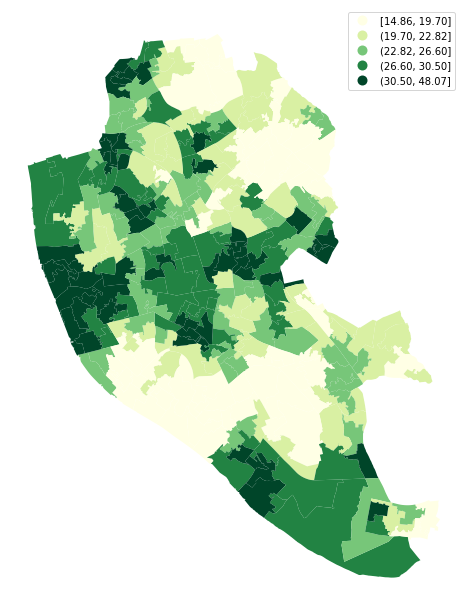

In [19]:
ax = ahah.plot(column="ahah", 
        scheme="quantiles", 
        k=5,
        cmap="YlGn",
        legend=True,
        figsize=(10, 11)
       )
ax.set_axis_off()

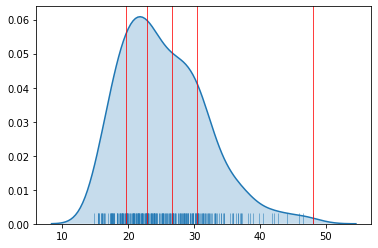

In [21]:
classi = mapclassify.Quantiles(ahah["ahah"], k=5)

# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(ahah["ahah"], shade=True, legend=False)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(ahah["ahah"], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

## Fisher-Jenks with five classes

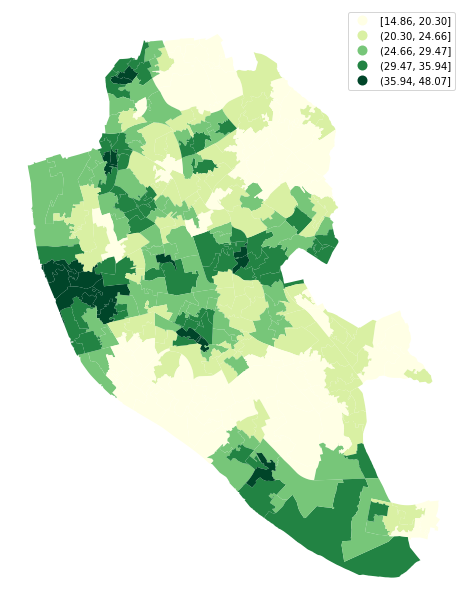

In [22]:
ax = ahah.plot(column="ahah", 
        scheme="fisher_jenks", 
        k=5,
        cmap="YlGn",
        legend=True,
        figsize=(10, 11)
       )
ax.set_axis_off()

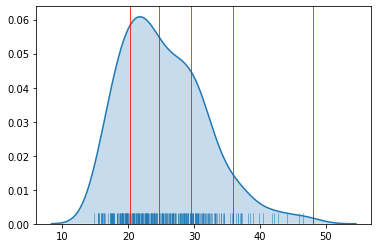

In [23]:
classi = mapclassify.FisherJenks(ahah["ahah"], k=5)

# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(ahah["ahah"], shade=True, legend=False)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(ahah["ahah"], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

## Unique Values

Setup:

LSOAs split in two classes: above and below the average AHAH score. Qualitative label (above or below) assigned to each LSOA. Unique value map for the labels.

In [32]:
print(f"Average AHAH is {ahah['ahah'].mean():.2f}")

Average AHAH is 25.42


In [28]:
ahah['above_avg_ahah']= ahah['ahah'] > ahah['ahah'].mean()

In [33]:
ahah[['above_avg_ahah','ahah']].groupby('above_avg_ahah').describe()

ahah                                                        \
                count       mean       std        min        25%        50%   
above_avg_ahah                                                                
False           165.0  20.774152  2.728697  14.861336  18.734410  20.914895   
True            133.0  31.190575  4.664977  25.539157  27.920813  30.171299   

                                      
                      75%        max  
above_avg_ahah                        
False           22.918472  25.396066  
True            33.221349  48.067407

In [34]:
ahah['label_name'] = pd.DataFrame(np.where(ahah['above_avg_ahah'] == 1, "Above", "Below"))

In [36]:
ahah[['label_name','ahah']].groupby('label_name').describe()

ahah                                                        \
            count       mean       std        min        25%        50%   
label_name                                                                
Above       133.0  31.190575  4.664977  25.539157  27.920813  30.171299   
Below       165.0  20.774152  2.728697  14.861336  18.734410  20.914895   

                                  
                  75%        max  
label_name                        
Above       33.221349  48.067407  
Below       22.918472  25.396066

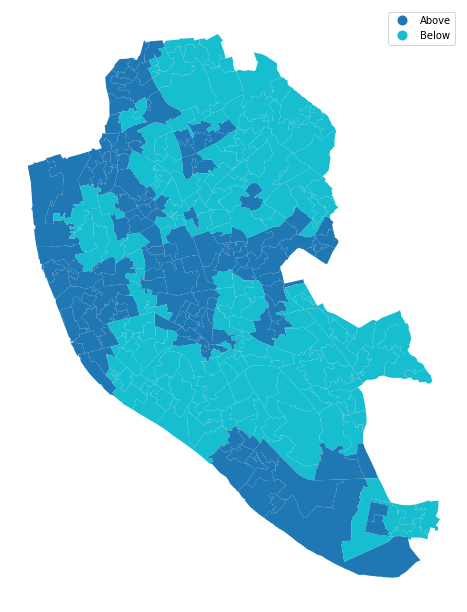

In [40]:
ax = ahah.plot(column="label_name", 
        categorical=True, 
        legend=True,
        figsize=(10, 11)
       )

ax.set_axis_off()